# Proof of Concept for Creating an Updated Hardiness Map



In [19]:
import numpy as np
import pandas as pd
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [20]:
df = pd.read_csv('gsoy_filtered.csv')
df.head()

,Unnamed: 0,DATE,LATITUDE,LONGITUDE,EMNT
0,46,2019,32.94520,-85.94800,-7.8
1,51,2019,33.12720,-88.15500,-11.1
2,15,2019,34.96285,-87.37195,-9.4
3,45,2019,34.77520,-86.95080,-8.3
4,56,2019,31.18200,-87.43900,-4.4


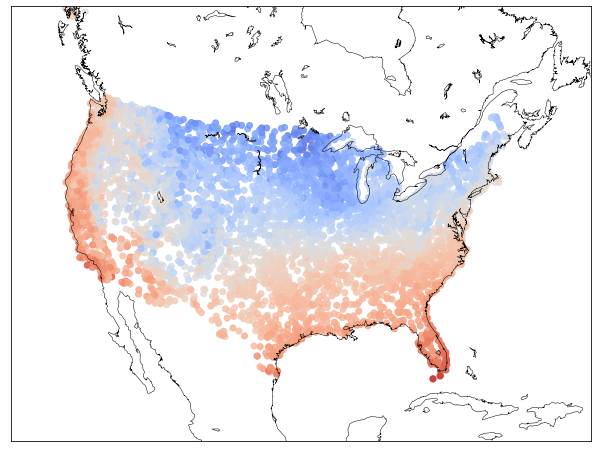

In [21]:
lon = df['LONGITUDE'].to_numpy()
lat = df['LATITUDE'].to_numpy()
emnt = df['EMNT'].to_numpy()

fig = plt.figure(num=None, figsize=(12, 8)) 

m = Basemap(
    width=6000000,
    height=4500000,
    resolution='l',
    projection='aea',
    lat_1=35.,
    lat_2=45,
    lon_0=-95,
    lat_0=40
    )

x, y = m(lon, lat)
m.scatter(x, y, c=emnt, cmap='coolwarm', alpha=0.8)
m.drawcoastlines(linewidth=0.5)

In [22]:

grid_res = 500

x = np.linspace(lon.min(), lon.max(), grid_res)
y = np.linspace(lat.min(), lat.max(), grid_res)
xx, yy = np.meshgrid(x, y)

emnt2 = griddata(
    (lon, lat),
    emnt,
    (xx[None,:], yy[:,None]),
    method='linear'
    )

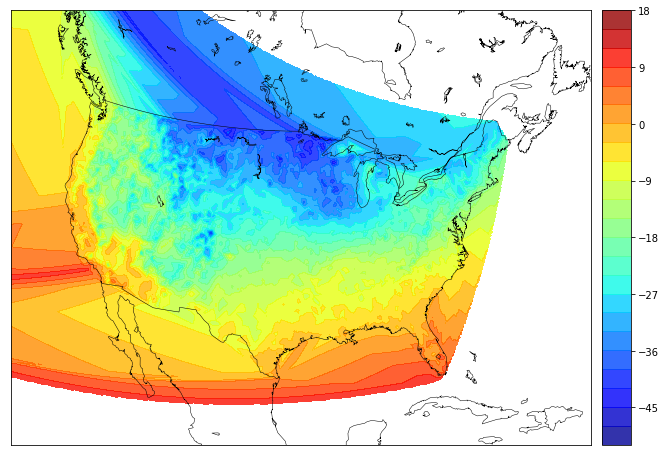

In [23]:
fig = plt.figure(num=None, figsize=(12, 8)) 

m = Basemap(
    width=6000000,
    height=4500000,
    resolution='l',
    projection='aea',
    lat_1=35.,
    lat_2=45,
    lon_0=-95,
    lat_0=40
    )
xx, yy = m(xx, yy)
m.contourf(xx, yy, emnt2[:,0,:], range(-51, 21, 3), cmap='jet', alpha=0.8)

m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.5)
m.colorbar()